**Applying Recurrent Neural Networks for Weather feature predictions**

In [ ]:
import numpy as np
import pandas as pd
import keras
from keras.models import Sequential
from keras.layers import LSTM,Dense ,Dropout
import sklearn
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

In [ ]:
from google.colab import files
data_to_load = files.upload()

Saving temperature.csv to temperature (1).csv


# ***TEMPERATURE***

---



In [ ]:
import io
df = pd.read_csv(io.BytesIO(data_to_load['temperature.csv']))

In [ ]:
display(df)

,datetime,Vancouver,Portland,San Francisco,Seattle,Los Angeles,San Diego,Las Vegas,Phoenix,Albuquerque,Denver,San Antonio,Dallas,Houston,Kansas City,Minneapolis,Saint Louis,Chicago,Nashville,Indianapolis,Atlanta,Detroit,Jacksonville,Charlotte,Miami,Pittsburgh,Toronto,Philadelphia,New York,Montreal,Boston,Beersheba,Tel Aviv District,Eilat,Haifa,Nahariyya,Jerusalem
0,2012-10-01 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,309.100000,NaN,NaN,NaN
1,2012-10-01 13:00:00,284.630000,282.080000,289.480000,281.800000,291.870000,291.530000,293.410000,296.600000,285.120000,284.610000,289.290000,289.740000,288.270000,289.980000,286.870000,286.180000,284.010000,287.410000,283.850000,294.030000,284.030000,298.170000,288.650000,299.720000,281.000000,286.260000,285.630000,288.220000,285.830000,287.170000,307.590000,305.470000,310.580000,304.4,304.4,303.5
2,2012-10-01 14:00:00,284.629041,282.083252,289.474993,281.797217,291.868186,291.533501,293.403141,296.608509,285.154558,284.607306,289.303649,289.762974,288.297576,289.997635,286.893636,286.185246,284.054691,287.421360,283.889394,294.035341,284.069789,298.205230,288.650172,299.732518,281.024767,286.262541,285.663208,288.247676,285.834650,287.186092,307.590000,304.310000,310.495769,304.4,304.4,303.5
3,2012-10-01 15:00:00,284.626998,282.091866,289.460618,281.789833,291.862844,291.543355,293.392177,296.631487,285.233952,284.599918,289.338497,289.830767,288.334343,290.038151,286.951401,286.199194,284.177412,287.454637,283.941919,294.049702,284.173965,298.299595,288.650582,299.766579,281.088319,286.269518,285.756824,288.326940,285.847790,287.231672,307.391513,304.281841,310.411538,304.4,304.4,303.5
4,2012-10-01 16:00:00,284.624955,282.100481,289.446243,281.782449,291.857503,291.553209,293.381213,296.654466,285.313345,284.592530,289.373345,289.898560,288.371111,290.078666,287.009166,286.213142,284.300133,287.487914,283.994444,294.064063,284.278140,298.393961,288.650991,299.800641,281.151870,286.276496,285.850440,288.406203,285.860929,287.277251,307.145200,304.238015,310.327308,304.4,304.4,303.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45248,2017-11-29 20:00:00,NaN,282.000000,NaN,280.820000,293.550000,292.150000,289.540000,294.710000,285.720000,289.560000,294.700000,290.480000,295.150000,285.330000,279.790000,285.410000,281.340000,292.890000,285.980000,290.040000,281.250000,296.920000,294.150000,NaN,285.300000,278.740000,290.240000,NaN,275.130000,288.080000,NaN,NaN,NaN,NaN,NaN,NaN
45249,2017-11-29 21:00:00,NaN,282.890000,NaN,281.650000,295.680000,292.740000,290.610000,295.590000,286.450000,290.700000,295.820000,291.020000,295.820000,285.160000,280.220000,286.010000,281.690000,292.400000,286.170000,291.420000,281.050000,296.920000,293.900000,NaN,285.330000,278.750000,289.240000,NaN,274.130000,286.020000,NaN,NaN,NaN,NaN,NaN,NaN
45250,2017-11-29 22:00:00,NaN,283.390000,NaN,282.750000,295.960000,292.580000,291.340000,296.250000,286.440000,289.710000,296.040000,291.150000,296.370000,285.160000,279.920000,286.040000,281.070000,291.650000,284.210000,291.840000,280.170000,296.330000,292.060000,NaN,282.910000,277.550000,286.780000,NaN,273.480000,283.940000,NaN,NaN,NaN,NaN,NaN,NaN
45251,2017-11-29 23:00:00,NaN,283.020000,NaN,282.960000,295.650000,292.610000,292.150000,297.150000,286.140000,289.170000,295.280000,289.590000,294.650000,285.360000,279.070000,285.030000,280.060000,287.640000,283.200000,290.640000,278.060000,294.950000,287.580000,NaN,280.140000,276.160000,284.570000,NaN,272.480000,282.170000,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#keeping only the temperature column for each city and removing null values

# temperature of san antonio
tempS =  df.drop(df.iloc[:,0:11].columns, axis = 1); tempS = tempS.drop(tempS.iloc[:,1:].columns,axis =1)
tempS = tempS.rename(columns={tempS.columns[0]: " San Antonio temperature(K)"})
tempS = tempS.dropna(axis=0); tempS= tempS.reset_index(drop=True)

# temperature of dallas
tempD =  df.drop(df.iloc[:,0:12].columns, axis = 1); tempD = tempD.drop(tempD.iloc[:,1:].columns,axis =1)
tempD = tempD.rename(columns={tempD.columns[0]: " Dallas temperature(K)"})
tempD = tempD.dropna(axis=0); tempD= tempD.reset_index(drop=True)

# temperature of houston
tempH =  df.drop(df.iloc[:,0:13].columns, axis = 1); tempH = tempH.drop(tempH.iloc[:,1:].columns,axis =1)
tempH = tempH.rename(columns={tempH.columns[0]: " Houston temperature(K)"})
tempH = tempH.dropna(axis=0); tempH= tempH.reset_index(drop=True)


In [ ]:
len(tempD)

45249

**MODELING FOR SAN ANTONIO CITY - TEMPERATURE**

In [ ]:
# Modeling for San Antonio Temperature
training_data = tempS.iloc[:30000]; testing_data = tempS.iloc[30000:]

#Normalizing the data
scaler_sa = MinMaxScaler(feature_range=(0,1)); training_data_normalized = scaler_sa.fit_transform(training_data)

In [ ]:
# Split into input and outputs for San Antonio temperature
x_train_sa = []; y_train_sa = []
next = 4; past= 30

for i in range(0,len(training_data_normalized)-past-next+1):
    x_train_sa.append(training_data_normalized[i : i + past , 0])     
    y_train_sa.append(training_data_normalized[i + past : i + past + next , 0 ])

In [ ]:
x_train_sa , y_train_sa = np.array(x_train_sa), np.array(y_train_sa)

#x_train_sa = np.reshape(x_train_sa, (x_train_sa.shape[0] , 1, x_train_sa.shape[1]) )
x_train_sa = np.reshape(x_train_sa, (x_train_sa.shape[0] , x_train_sa.shape[1],1) )


In [ ]:
x_train_sa.shape

(29967, 30, 1)

In [ ]:
# Training for 25 Epochs
model_saTemp = Sequential()

model_saTemp.add(LSTM(units=30, input_shape = (x_train_sa.shape[1],1))); model_saTemp.add(Dense(units = next,activation='softmax'))
model_saTemp.compile(optimizer='adam', loss='mean_squared_error',metrics=['acc'])

history_sa = model_saTemp.fit(x_train_sa, y_train_sa, epochs=25,batch_size=100 )

Epoch 1/25
300/300 [==============================] - 1s 4ms/step - loss: 0.1353 - acc: 0.5492
Epoch 2/25
300/300 [==============================] - 1s 4ms/step - loss: 0.1351 - acc: 0.6868
Epoch 3/25
300/300 [==============================] - 1s 4ms/step - loss: 0.1351 - acc: 0.6884
Epoch 4/25
300/300 [==============================] - 1s 4ms/step - loss: 0.1351 - acc: 0.6908
Epoch 5/25
300/300 [==============================] - 1s 4ms/step - loss: 0.1351 - acc: 0.6909
Epoch 6/25
300/300 [==============================] - 1s 4ms/step - loss: 0.1351 - acc: 0.6921
Epoch 7/25
300/300 [==============================] - 1s 4ms/step - loss: 0.1351 - acc: 0.6898
Epoch 8/25
300/300 [==============================] - 1s 4ms/step - loss: 0.1351 - acc: 0.6915
Epoch 9/25
300/300 [==============================] - 1s 4ms/step - loss: 0.1351 - acc: 0.6920
Epoch 10/25
300/300 [==============================] - 1s 4ms/step - loss: 0.1351 - acc: 0.6940
Epoch 11/25
300/300 [============================

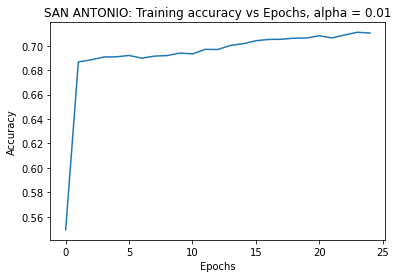

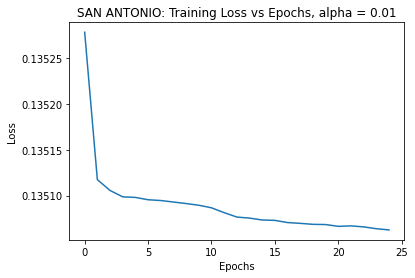

Training accuracy 25 epochs(lr 0.001): 71.03814482688904 
Training loss 25 epochs(lr 0.001): 0.1350625455379486 
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24]


In [ ]:
#Plot testing accuracy vs Epochs
plt.plot(history_sa.history['acc']); plt.title('SAN ANTONIO: Training accuracy vs Epochs, alpha = 0.01')
plt.ylabel('Accuracy'); plt.xlabel('Epochs')
plt.show()

#Plot training loss vs Epochs
plt.plot(history_sa.history['loss']); plt.title('SAN ANTONIO: Training Loss vs Epochs, alpha = 0.01')
plt.ylabel('Loss'); plt.xlabel('Epochs')
plt.show()

print(f"Training accuracy 25 epochs(lr 0.001): {history_sa.history['acc'][-1] * 100} " ); print(f"Training loss 25 epochs(lr 0.001): {history_sa.history['loss'][-1]} " )

print(history_sa.epoch)

**SECOND MODEL FOR SAN ANTONIO - TEMPERATURE (Slightly improves accuracy compared to first model above)**

In [ ]:
model2_saTemp = Sequential()

model2_saTemp.add(LSTM(units=50,return_sequences=True, input_shape = (x_train_sa.shape[1],x_train_sa.shape[2])))
model2_saTemp.add(Dropout(0.2))
model2_saTemp.add(LSTM(32, return_sequences=True))
model2_saTemp.add(Dropout(0.2))
model2_saTemp.add(LSTM(32))
model2_saTemp.add(Dense(units = next,activation='softmax'))

opt = keras.optimizers.Adam(learning_rate=0.001)
model2_saTemp.compile(optimizer=opt, loss='mean_squared_error',metrics=['acc'])

history_sa2 = model2_saTemp.fit(x_train_sa, y_train_sa, epochs=50,batch_size=32)

Epoch 1/50
937/937 [==============================] - 8s 8ms/step - loss: 0.1351 - acc: 0.6567
Epoch 2/50
937/937 [==============================] - 7s 8ms/step - loss: 0.1351 - acc: 0.6942
Epoch 3/50
937/937 [==============================] - 7s 8ms/step - loss: 0.1351 - acc: 0.7012
Epoch 4/50
937/937 [==============================] - 8s 8ms/step - loss: 0.1351 - acc: 0.7023
Epoch 5/50
937/937 [==============================] - 8s 8ms/step - loss: 0.1351 - acc: 0.7061
Epoch 6/50
937/937 [==============================] - 8s 8ms/step - loss: 0.1351 - acc: 0.7059
Epoch 7/50
937/937 [==============================] - 7s 8ms/step - loss: 0.1351 - acc: 0.7062
Epoch 8/50
937/937 [==============================] - 7s 8ms/step - loss: 0.1351 - acc: 0.7077
Epoch 9/50
937/937 [==============================] - 8s 8ms/step - loss: 0.1351 - acc: 0.7094
Epoch 10/50
937/937 [==============================] - 8s 8ms/step - loss: 0.1351 - acc: 0.7112
Epoch 11/50
937/937 [============================

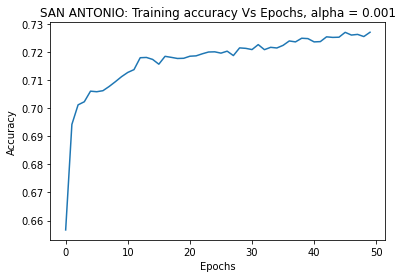

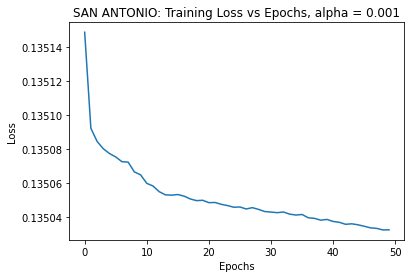

Training accuracy 25 epochs(lr 0.001): 72.70664572715759 
Training loss 25 epochs(lr 0.001): 0.13503241539001465 
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]


In [ ]:
#Plot testing accuracy vs Epochs
plt.plot(history_sa2.history['acc']); plt.title('SAN ANTONIO: Training accuracy Vs Epochs, alpha = 0.001'); plt.ylabel('Accuracy'); plt.xlabel('Epochs')
plt.show()

#Plot training loss vs Epochs
plt.plot(history_sa2.history['loss']); plt.title('SAN ANTONIO: Training Loss vs Epochs, alpha = 0.001'); plt.ylabel('Loss'); plt.xlabel('Epochs')
plt.show()

print(f"Training accuracy 25 epochs(lr 0.001): {history_sa2.history['acc'][-1] * 100} " ); print(f"Training loss 25 epochs(lr 0.001): {history_sa2.history['loss'][-1]} " )

print(history_sa2.epoch)

**MODELING FOR DALLAS CITY - TEMPERATURE**

In [ ]:
# Modeling for Dallas Temperature
training_data = tempD.iloc[:30000]; testing_data = tempD.iloc[30000:]

#Normalizing the data
scaler_da = MinMaxScaler(feature_range=(0,1)); training_data_normalized = scaler_da.fit_transform(training_data)

In [ ]:
# Split into input and outputs for Dallas temperature
x_train_da = []; y_train_da = []
next = 4; past= 30

for i in range(0,len(training_data_normalized)-past-next+1):
    x_train_da.append(training_data_normalized[i : i + past , 0])     
    y_train_da.append(training_data_normalized[i + past : i + past + next , 0 ])

In [ ]:
x_train_da , y_train_da = np.array(x_train_da), np.array(y_train_da)

#x_train_da = np.reshape(x_train_da, (x_train_da.shape[0] , 1, x_train_da.shape[1]) )
x_train_da = np.reshape(x_train_da, (x_train_da.shape[0] , x_train_da.shape[1],1) )

In [ ]:
# Training for 25 Epochs
model_daTemp = Sequential()

model_daTemp.add(LSTM(units=30, input_shape = (x_train_da.shape[1],1))); model_daTemp.add(Dense(units = next,activation='softmax'))
model_daTemp.compile(optimizer='adam', loss='mean_squared_error',metrics=['acc'])

history_da = model_daTemp.fit(x_train_da, y_train_da, epochs=25,batch_size=100 )

Epoch 1/25
300/300 [==============================] - 1s 4ms/step - loss: 0.1319 - acc: 0.5687
Epoch 2/25
300/300 [==============================] - 1s 4ms/step - loss: 0.1318 - acc: 0.6700
Epoch 3/25
300/300 [==============================] - 1s 4ms/step - loss: 0.1318 - acc: 0.6808
Epoch 4/25
300/300 [==============================] - 1s 4ms/step - loss: 0.1318 - acc: 0.6835
Epoch 5/25
300/300 [==============================] - 1s 4ms/step - loss: 0.1318 - acc: 0.6863
Epoch 6/25
300/300 [==============================] - 1s 4ms/step - loss: 0.1318 - acc: 0.6904
Epoch 7/25
300/300 [==============================] - 1s 4ms/step - loss: 0.1318 - acc: 0.6909
Epoch 8/25
300/300 [==============================] - 1s 4ms/step - loss: 0.1318 - acc: 0.6931
Epoch 9/25
300/300 [==============================] - 1s 4ms/step - loss: 0.1318 - acc: 0.6930
Epoch 10/25
300/300 [==============================] - 1s 4ms/step - loss: 0.1318 - acc: 0.6937
Epoch 11/25
300/300 [============================

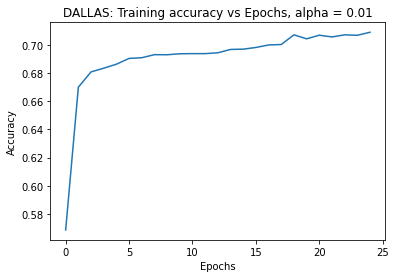

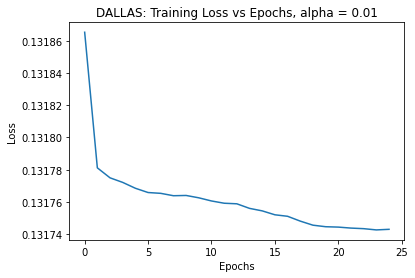

Training accuracy 25 epochs(lr 0.01): 70.90132236480713 
Training loss 25 epochs(lr 0.01): 0.13174308836460114 
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24]


In [ ]:
#Plot testing accuracy vs Epochs
plt.plot(history_da.history['acc']); plt.title('DALLAS: Training accuracy vs Epochs, alpha = 0.01'); plt.ylabel('Accuracy'); plt.xlabel('Epochs')
plt.show()

#Plot training loss vs Epochs
plt.plot(history_da.history['loss']); plt.title('DALLAS: Training Loss vs Epochs, alpha = 0.01'); plt.ylabel('Loss'); plt.xlabel('Epochs')
plt.show()

print(f"Training accuracy 25 epochs(lr 0.01): {history_da.history['acc'][-1] * 100} "); print(f"Training loss 25 epochs(lr 0.01): {history_da.history['loss'][-1]} " )

print(history_da.epoch)

**SECOND MODEL FOR DALLAS - TEMPERATURE (With slightly improved accuracy)**

In [ ]:
model2_daTemp = Sequential()

model2_daTemp.add(LSTM(units=50,return_sequences=True, input_shape = (x_train_da.shape[1],1)))
model2_daTemp.add(Dropout(0.2))
model2_daTemp.add(LSTM(32, return_sequences=True))
model2_daTemp.add(Dropout(0.2))
model2_daTemp.add(LSTM(32))
model2_daTemp.add(Dense(units = next,activation='softmax'))

opt = keras.optimizers.Adam(learning_rate=0.001)
model2_daTemp.compile(optimizer=opt, loss='mean_squared_error',metrics=['acc'])

history_da2 = model2_daTemp.fit(x_train_da, y_train_da, epochs=50,batch_size=32 )

Epoch 1/50
937/937 [==============================] - 8s 8ms/step - loss: 0.1318 - acc: 0.6448
Epoch 2/50
937/937 [==============================] - 8s 8ms/step - loss: 0.1318 - acc: 0.6935
Epoch 3/50
937/937 [==============================] - 8s 8ms/step - loss: 0.1318 - acc: 0.7001
Epoch 4/50
937/937 [==============================] - 8s 8ms/step - loss: 0.1318 - acc: 0.7033
Epoch 5/50
937/937 [==============================] - 8s 8ms/step - loss: 0.1318 - acc: 0.7055
Epoch 6/50
937/937 [==============================] - 8s 8ms/step - loss: 0.1317 - acc: 0.7058
Epoch 7/50
937/937 [==============================] - 8s 8ms/step - loss: 0.1317 - acc: 0.7084
Epoch 8/50
937/937 [==============================] - 8s 8ms/step - loss: 0.1317 - acc: 0.7056
Epoch 9/50
937/937 [==============================] - 8s 8ms/step - loss: 0.1317 - acc: 0.7080
Epoch 10/50
937/937 [==============================] - 8s 8ms/step - loss: 0.1317 - acc: 0.7076
Epoch 11/50
937/937 [============================

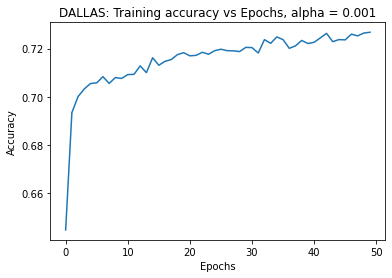

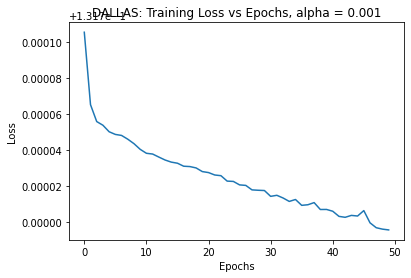

Training accuracy 25 epochs(lr 0.001): 72.6799488067627 
Training loss 25 epochs(lr 0.001): 0.13169562816619873 
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]


In [ ]:
#Plot testing accuracy vs Epochs
plt.plot(history_da2.history['acc']); plt.title('DALLAS: Training accuracy vs Epochs, alpha = 0.001'); plt.ylabel('Accuracy'); plt.xlabel('Epochs')
plt.show()

#Plot training loss vs Epochs
plt.plot(history_da2.history['loss']); plt.title('DALLAS: Training Loss vs Epochs, alpha = 0.001'); plt.ylabel('Loss'); plt.xlabel('Epochs')
plt.show()

print(f"Training accuracy 25 epochs(lr 0.001): {history_da2.history['acc'][-1] * 100} "); print(f"Training loss 25 epochs(lr 0.001): {history_da2.history['loss'][-1]} " )

print(history_da2.epoch)

**MODELING FOR HOUSTON CITY - TEMPERATURE**

In [ ]:
# Modeling for Houston Temperature
training_data = tempH.iloc[:30000]; testing_data = tempH.iloc[30000:]

#Normalizing the data
scaler_hou = MinMaxScaler(feature_range=(0,1)); training_data_normalized = scaler_hou.fit_transform(training_data)

In [ ]:
# Split into input and outputs for Houston temperature
x_train_hou = []; y_train_hou = []
next = 4; past= 30

for i in range(0,len(training_data_normalized)-past-next+1):
    x_train_hou.append(training_data_normalized[i : i + past , 0])     
    y_train_hou.append(training_data_normalized[i + past : i + past + next , 0 ])

In [ ]:
x_train_hou , y_train_hou = np.array(x_train_hou), np.array(y_train_hou)

#x_train_hou = np.reshape(x_train_hou, (x_train_hou.shape[0] , 1, x_train_hou.shape[1]) )
x_train_hou = np.reshape(x_train_hou, (x_train_hou.shape[0] , x_train_hou.shape[1],1) )

In [ ]:
# Training for 25 Epochs
model_houTemp = Sequential()

model_houTemp.add(LSTM(units=30, input_shape = (x_train_hou.shape[1],1))); model_houTemp.add(Dense(units = next,activation='softmax'))
model_houTemp.compile(optimizer='adam', loss='mean_squared_error',metrics=['acc'])

history_hou = model_houTemp.fit(x_train_hou, y_train_hou, epochs=25,batch_size=100 )

Epoch 1/25
300/300 [==============================] - 1s 4ms/step - loss: 0.1252 - acc: 0.5674
Epoch 2/25
300/300 [==============================] - 1s 4ms/step - loss: 0.1251 - acc: 0.6554
Epoch 3/25
300/300 [==============================] - 1s 4ms/step - loss: 0.1251 - acc: 0.6640
Epoch 4/25
300/300 [==============================] - 1s 4ms/step - loss: 0.1251 - acc: 0.6675
Epoch 5/25
300/300 [==============================] - 1s 4ms/step - loss: 0.1251 - acc: 0.6733
Epoch 6/25
300/300 [==============================] - 1s 4ms/step - loss: 0.1251 - acc: 0.6753
Epoch 7/25
300/300 [==============================] - 1s 4ms/step - loss: 0.1251 - acc: 0.6792
Epoch 8/25
300/300 [==============================] - 1s 4ms/step - loss: 0.1251 - acc: 0.6826
Epoch 9/25
300/300 [==============================] - 1s 4ms/step - loss: 0.1251 - acc: 0.6831
Epoch 10/25
300/300 [==============================] - 1s 4ms/step - loss: 0.1251 - acc: 0.6818
Epoch 11/25
300/300 [============================

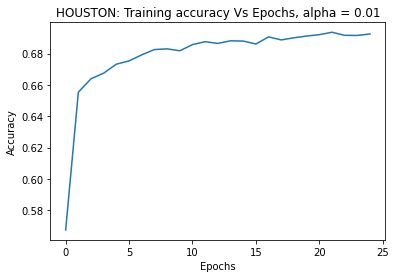

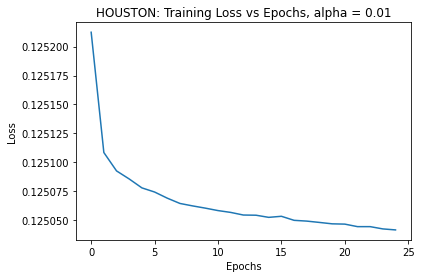

Training accuracy 25 epochs(lr 0.001): 69.25618052482605 
Training loss 25 epochs(lr 0.001): 0.1250416338443756 
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24]


In [ ]:
#Plot testing accuracy vs Epochs
plt.plot(history_hou.history['acc']); plt.title('HOUSTON: Training accuracy Vs Epochs, alpha = 0.01'); plt.ylabel('Accuracy'); plt.xlabel('Epochs')
plt.show()

#Plot training loss vs Epochs
plt.plot(history_hou.history['loss']); plt.title('HOUSTON: Training Loss vs Epochs, alpha = 0.01'); plt.ylabel('Loss'); plt.xlabel('Epochs')
plt.show()

print(f"Training accuracy 25 epochs(lr 0.001): {history_hou.history['acc'][-1] * 100} "); print(f"Training loss 25 epochs(lr 0.001): {history_hou.history['loss'][-1]} " )

print(history_hou.epoch)

**Second model for Houston Temperature**

In [ ]:
model2_houTemp = Sequential()

model2_houTemp.add(LSTM(units=50,return_sequences=True, input_shape = (x_train_hou.shape[1],1)))
model2_houTemp.add(Dropout(0.2))
model2_houTemp.add(LSTM(32, return_sequences=True))
model2_houTemp.add(Dropout(0.2))
model2_houTemp.add(LSTM(32))
model2_houTemp.add(Dense(units = next,activation='softmax'))

opt = keras.optimizers.Adam(learning_rate=0.001)
model2_houTemp.compile(optimizer=opt, loss='mean_squared_error',metrics=['acc'])

history2_hou = model2_houTemp.fit(x_train_hou, y_train_hou, epochs=50,batch_size=32 )

Epoch 1/50
937/937 [==============================] - 7s 8ms/step - loss: 0.1251 - acc: 0.6301
Epoch 2/50
937/937 [==============================] - 7s 8ms/step - loss: 0.1251 - acc: 0.6761
Epoch 3/50
937/937 [==============================] - 7s 8ms/step - loss: 0.1251 - acc: 0.6823
Epoch 4/50
937/937 [==============================] - 8s 8ms/step - loss: 0.1251 - acc: 0.6881
Epoch 5/50
937/937 [==============================] - 8s 8ms/step - loss: 0.1251 - acc: 0.6884
Epoch 6/50
937/937 [==============================] - 7s 8ms/step - loss: 0.1251 - acc: 0.6877
Epoch 7/50
937/937 [==============================] - 7s 8ms/step - loss: 0.1251 - acc: 0.6895
Epoch 8/50
937/937 [==============================] - 8s 8ms/step - loss: 0.1250 - acc: 0.6897
Epoch 9/50
937/937 [==============================] - 8s 8ms/step - loss: 0.1250 - acc: 0.6908
Epoch 10/50
937/937 [==============================] - 7s 8ms/step - loss: 0.1250 - acc: 0.6914
Epoch 11/50
937/937 [============================

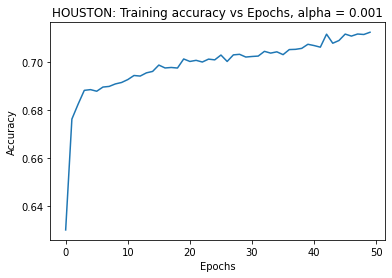

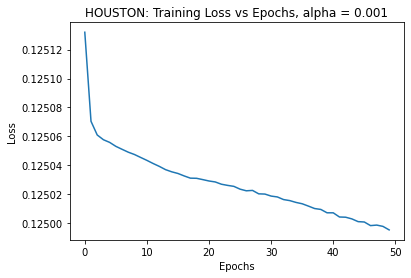

Training accuracy 25 epochs(lr 0.001): 71.22501134872437 
Training loss 25 epochs(lr 0.001): 0.12499528378248215 
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]


In [ ]:
#Plot testing accuracy vs Epochs
plt.plot(history2_hou.history['acc']); plt.title('HOUSTON: Training accuracy vs Epochs, alpha = 0.001'); plt.ylabel('Accuracy'); plt.xlabel('Epochs')
plt.show()

#Plot training loss vs Epochs
plt.plot(history2_hou.history['loss']); plt.title('HOUSTON: Training Loss vs Epochs, alpha = 0.001'); plt.ylabel('Loss'); plt.xlabel('Epochs')
plt.show()

print(f"Training accuracy 25 epochs(lr 0.001): {history2_hou.history['acc'][-1] * 100} "); print(f"Training loss 25 epochs(lr 0.001): {history2_hou.history['loss'][-1]} " )

print(history2_hou.epoch)

# ***HUMIDITY***

---



In [ ]:
from google.colab import files
data_to_load = files.upload()

Saving humidity.csv to humidity.csv


In [ ]:
import io
df2 = pd.read_csv(io.BytesIO(data_to_load['humidity.csv']))

In [ ]:
display(df2)

,datetime,Vancouver,Portland,San Francisco,Seattle,Los Angeles,San Diego,Las Vegas,Phoenix,Albuquerque,Denver,San Antonio,Dallas,Houston,Kansas City,Minneapolis,Saint Louis,Chicago,Nashville,Indianapolis,Atlanta,Detroit,Jacksonville,Charlotte,Miami,Pittsburgh,Toronto,Philadelphia,New York,Montreal,Boston,Beersheba,Tel Aviv District,Eilat,Haifa,Nahariyya,Jerusalem
0,2012-10-01 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25.0,NaN,NaN,NaN
1,2012-10-01 13:00:00,76.0,81.0,88.0,81.0,88.0,82.0,22.0,23.0,50.0,62.0,93.0,87.0,93.0,71.0,67.0,71.0,71.0,100.0,76.0,94.0,76.0,88.0,87.0,83.0,93.0,82.0,71.0,58.0,93.0,68.0,50.0,63.0,22.0,51.0,51.0,50.0
2,2012-10-01 14:00:00,76.0,80.0,87.0,80.0,88.0,81.0,21.0,23.0,49.0,62.0,92.0,86.0,92.0,70.0,66.0,71.0,70.0,99.0,76.0,94.0,75.0,87.0,87.0,82.0,93.0,81.0,70.0,57.0,91.0,68.0,51.0,62.0,22.0,51.0,51.0,50.0
3,2012-10-01 15:00:00,76.0,80.0,86.0,80.0,88.0,81.0,21.0,23.0,49.0,62.0,92.0,86.0,90.0,70.0,66.0,71.0,70.0,99.0,76.0,94.0,75.0,87.0,87.0,82.0,93.0,79.0,70.0,57.0,87.0,68.0,51.0,62.0,22.0,51.0,51.0,50.0
4,2012-10-01 16:00:00,77.0,80.0,85.0,79.0,88.0,81.0,21.0,23.0,49.0,62.0,92.0,86.0,89.0,70.0,65.0,71.0,70.0,99.0,76.0,94.0,74.0,87.0,87.0,82.0,93.0,77.0,69.0,57.0,84.0,68.0,52.0,62.0,22.0,51.0,51.0,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45248,2017-11-29 20:00:00,NaN,81.0,NaN,93.0,24.0,72.0,18.0,68.0,37.0,18.0,37.0,45.0,68.0,32.0,31.0,32.0,52.0,32.0,32.0,82.0,39.0,47.0,21.0,NaN,20.0,45.0,27.0,NaN,64.0,37.0,NaN,NaN,NaN,NaN,NaN,NaN
45249,2017-11-29 21:00:00,NaN,71.0,NaN,87.0,21.0,72.0,18.0,73.0,34.0,12.0,35.0,42.0,73.0,27.0,31.0,37.0,65.0,34.0,32.0,73.0,39.0,47.0,21.0,NaN,23.0,48.0,29.0,NaN,59.0,74.0,NaN,NaN,NaN,NaN,NaN,NaN
45250,2017-11-29 22:00:00,NaN,71.0,NaN,93.0,23.0,68.0,17.0,60.0,32.0,15.0,38.0,42.0,50.0,27.0,30.0,37.0,96.0,36.0,39.0,77.0,42.0,53.0,24.0,NaN,27.0,52.0,31.0,NaN,66.0,74.0,NaN,NaN,NaN,NaN,NaN,NaN
45251,2017-11-29 23:00:00,NaN,71.0,NaN,87.0,14.0,63.0,17.0,33.0,30.0,28.0,37.0,45.0,49.0,30.0,35.0,46.0,75.0,39.0,52.0,82.0,52.0,73.0,38.0,NaN,36.0,64.0,26.0,NaN,58.0,56.0,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#keeping only the humidity column for each city and removing null values

# humidity of san antonio
humS =  df2.drop(df2.iloc[:,0:11].columns, axis = 1); humS = humS.drop(humS.iloc[:,1:].columns,axis =1)
humS = humS.rename(columns={humS.columns[0]: " San Antonio humidity"})
humS = humS.dropna(axis=0) ; humS= humS.reset_index(drop=True)

# humidity of dallas
humD =  df2.drop(df2.iloc[:,0:12].columns, axis = 1); humD = humD.drop(humD.iloc[:,1:].columns,axis =1)
humD = humD.rename(columns={humD.columns[0]: " Dallas humidity"})
humD = humD.dropna(axis=0) ; humD= humD.reset_index(drop=True)

# humidity of houston
humH =  df2.drop(df2.iloc[:,0:13].columns, axis = 1); humH = humH.drop(humH.iloc[:,1:].columns,axis =1)
humH = humH.rename(columns={humH.columns[0]: " Houston humidity"})
humH = humH.dropna(axis=0); humH= humH.reset_index(drop=True)

**MODELING FOR SAN ANTONIO CITY - HUMIDITY**

In [ ]:
# Modeling for San Antonio Humidity
training_data = humS.iloc[:30000]; testing_data = humS.iloc[30000:]

#Normalizing the data
scaler_sa = MinMaxScaler(feature_range=(0,1)); training_data_normalized = scaler_sa.fit_transform(training_data)

In [ ]:
# Split into input and outputs for San Antonio humidity
x_train_sa = []; y_train_sa = []
next = 4; past= 30

for i in range(0,len(training_data_normalized)-past-next+1):
    x_train_sa.append(training_data_normalized[i : i + past , 0])     
    y_train_sa.append(training_data_normalized[i + past : i + past + next , 0 ])

In [ ]:
x_train_sa , y_train_sa = np.array(x_train_sa), np.array(y_train_sa)

x_train_sa = np.reshape(x_train_sa, (x_train_sa.shape[0] , 1, x_train_sa.shape[1]))

In [ ]:
x_train_sa.shape

(29967, 1, 30)

In [ ]:
from keras.layers import LSTM,Dense,Dropout

# Training for 25 Epochs
model_saHum = Sequential()

model_saHum.add(LSTM(units=50, return_sequences=True, input_shape = (x_train_sa.shape[1],x_train_sa.shape[2])))
model_saHum.add(Dropout(0.2))
model_saHum.add(LSTM(32, return_sequences=True))
model_saHum.add(Dropout(0.2))
model_saHum.add(LSTM(32))
model_saHum.add(Dense(units = next,activation='softmax'))
model_saHum.compile(optimizer='adam', loss='mean_squared_error',metrics=['acc'])

history_sa = model_saHum.fit(x_train_sa, y_train_sa, epochs=25, batch_size=100 )  

Epoch 1/25
300/300 [==============================] - 2s 6ms/step - loss: 0.2120 - acc: 0.5208
Epoch 2/25
300/300 [==============================] - 2s 6ms/step - loss: 0.2117 - acc: 0.5463
Epoch 3/25
300/300 [==============================] - 2s 6ms/step - loss: 0.2117 - acc: 0.5466
Epoch 4/25
300/300 [==============================] - 2s 6ms/step - loss: 0.2117 - acc: 0.5499
Epoch 5/25
300/300 [==============================] - 2s 6ms/step - loss: 0.2117 - acc: 0.5485
Epoch 6/25
300/300 [==============================] - 2s 6ms/step - loss: 0.2117 - acc: 0.5490
Epoch 7/25
300/300 [==============================] - 2s 6ms/step - loss: 0.2117 - acc: 0.5465
Epoch 8/25
300/300 [==============================] - 2s 6ms/step - loss: 0.2117 - acc: 0.5488
Epoch 9/25
300/300 [==============================] - 2s 6ms/step - loss: 0.2117 - acc: 0.5498
Epoch 10/25
300/300 [==============================] - 2s 6ms/step - loss: 0.2117 - acc: 0.5498
Epoch 11/25
300/300 [============================

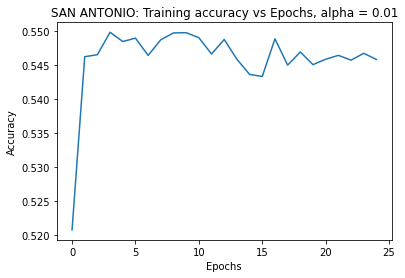

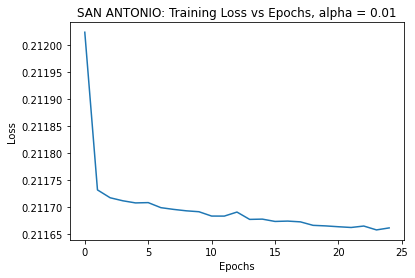

Training accuracy 25 epochs(lr 0.01): 54.58671450614929 
Training loss 25 epochs(lr 0.01): 0.21166087687015533 
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24]


In [ ]:
import matplotlib.pyplot as plt
#Plot testing accuracy vs Epochs
plt.plot(history_sa.history['acc']); plt.title('SAN ANTONIO: Training accuracy vs Epochs, alpha = 0.01'); plt.ylabel('Accuracy'); plt.xlabel('Epochs')
plt.show()

#Plot training loss vs Epochs
plt.plot(history_sa.history['loss']); plt.title('SAN ANTONIO: Training Loss vs Epochs, alpha = 0.01'); plt.ylabel('Loss'); plt.xlabel('Epochs')
plt.show()

print(f"Training accuracy 25 epochs(lr 0.01): {history_sa.history['acc'][-1] * 100} "); print(f"Training loss 25 epochs(lr 0.01): {history_sa.history['loss'][-1]} " )

print(history_sa.epoch)

In [ ]:
from keras.layers import LSTM,Dense,Dropout

# Training for 45 Epochs with batch size 75
model_saHum = Sequential()

model_saHum.add(LSTM(units=50, return_sequences=True, input_shape = (x_train_sa.shape[1],x_train_sa.shape[2])))
model_saHum.add(Dropout(0.2))
model_saHum.add(LSTM(32, return_sequences=True))
model_saHum.add(Dropout(0.2))
model_saHum.add(LSTM(32))
model_saHum.add(Dense(units = next,activation='softmax'))
model_saHum.compile(optimizer='adam', loss='mean_squared_error',metrics=['acc'])

history_sa = model_saHum.fit(x_train_sa, y_train_sa, epochs=45,batch_size=75 )

Epoch 1/45
400/400 [==============================] - 2s 6ms/step - loss: 0.2120 - acc: 0.5255
Epoch 2/45
400/400 [==============================] - 2s 6ms/step - loss: 0.2117 - acc: 0.5448
Epoch 3/45
400/400 [==============================] - 2s 6ms/step - loss: 0.2117 - acc: 0.5451
Epoch 4/45
400/400 [==============================] - 2s 6ms/step - loss: 0.2117 - acc: 0.5472
Epoch 5/45
400/400 [==============================] - 2s 6ms/step - loss: 0.2117 - acc: 0.5485
Epoch 6/45
400/400 [==============================] - 2s 6ms/step - loss: 0.2117 - acc: 0.5465
Epoch 7/45
400/400 [==============================] - 2s 6ms/step - loss: 0.2117 - acc: 0.5464
Epoch 8/45
400/400 [==============================] - 2s 6ms/step - loss: 0.2117 - acc: 0.5454
Epoch 9/45
400/400 [==============================] - 2s 6ms/step - loss: 0.2117 - acc: 0.5484
Epoch 10/45
400/400 [==============================] - 2s 6ms/step - loss: 0.2117 - acc: 0.5462
Epoch 11/45
400/400 [============================

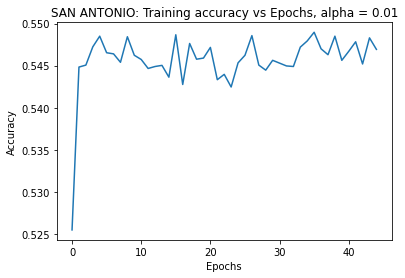

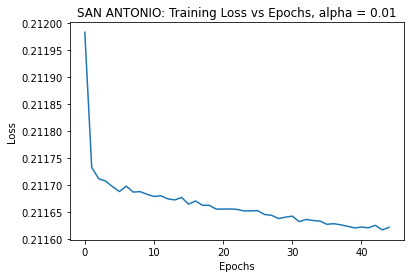

Training accuracy 25 epochs(lr 0.01): 54.693496227264404 
Training loss 25 epochs(lr 0.01): 0.2116212546825409 
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44]


In [ ]:
import matplotlib.pyplot as plt
#Plot testing accuracy vs Epochs -  Higher epochs, lower batch
plt.plot(history_sa.history['acc']); plt.title('SAN ANTONIO: Training accuracy vs Epochs, alpha = 0.01'); plt.ylabel('Accuracy'); plt.xlabel('Epochs')
plt.show()

#Plot training loss vs Epochs
plt.plot(history_sa.history['loss']); plt.title('SAN ANTONIO: Training Loss vs Epochs, alpha = 0.01'); plt.ylabel('Loss'); plt.xlabel('Epochs')
plt.show()

print(f"Training accuracy 25 epochs(lr 0.01): {history_sa.history['acc'][-1] * 100} "); print(f"Training loss 25 epochs(lr 0.01): {history_sa.history['loss'][-1]} " )

print(history_sa.epoch)

**MODELING FOR DALLAS CITY - HUMIDITY**

In [ ]:
# Modeling for Dallas Humidity
training_data = humD.iloc[:30000]; testing_data = humD.iloc[30000:]

#Normalizing the data
scaler_da = MinMaxScaler(feature_range=(0,1)); training_data_normalized = scaler_da.fit_transform(training_data)

In [ ]:
# Split into input and outputs for Dallas humidity
x_train_da = []; y_train_da = []
next = 4; past= 30

for i in range(0,len(training_data_normalized)-past-next+1):
    x_train_da.append(training_data_normalized[i : i + past , 0])     
    y_train_da.append(training_data_normalized[i + past : i + past + next , 0 ])

In [ ]:
x_train_da , y_train_da = np.array(x_train_da), np.array(y_train_da)

x_train_da = np.reshape(x_train_da, (x_train_da.shape[0] , 1, x_train_da.shape[1]))

In [ ]:
x_train_da.shape

(29967, 1, 30)

In [ ]:
from keras.layers import LSTM,Dense,Dropout

# Training for 25 Epochs
model_daHum = Sequential()

model_daHum.add(LSTM(units=50, return_sequences=True, input_shape = (x_train_da.shape[1],x_train_da.shape[2])))
model_daHum.add(Dropout(0.2))
model_daHum.add(LSTM(32, return_sequences=True))
model_daHum.add(Dropout(0.2))
model_daHum.add(LSTM(32))
model_daHum.add(Dense(units = next,activation='softmax'))
model_daHum.compile(optimizer='adam', loss='mean_squared_error',metrics=['acc'])

history_da = model_daHum.fit(x_train_da, y_train_da, epochs=25,batch_size=100 )

Epoch 1/25
300/300 [==============================] - 2s 6ms/step - loss: 0.1816 - acc: 0.4771
Epoch 2/25
300/300 [==============================] - 2s 6ms/step - loss: 0.1814 - acc: 0.5242
Epoch 3/25
300/300 [==============================] - 2s 6ms/step - loss: 0.1813 - acc: 0.5221
Epoch 4/25
300/300 [==============================] - 2s 6ms/step - loss: 0.1813 - acc: 0.5255
Epoch 5/25
300/300 [==============================] - 2s 6ms/step - loss: 0.1813 - acc: 0.5272
Epoch 6/25
300/300 [==============================] - 2s 6ms/step - loss: 0.1813 - acc: 0.5251
Epoch 7/25
300/300 [==============================] - 2s 6ms/step - loss: 0.1813 - acc: 0.5247
Epoch 8/25
300/300 [==============================] - 2s 6ms/step - loss: 0.1813 - acc: 0.5266
Epoch 9/25
300/300 [==============================] - 2s 6ms/step - loss: 0.1813 - acc: 0.5258
Epoch 10/25
300/300 [==============================] - 2s 6ms/step - loss: 0.1813 - acc: 0.5235
Epoch 11/25
300/300 [============================

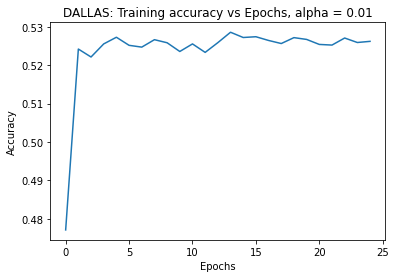

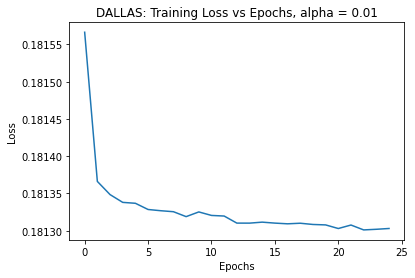

Training accuracy 25 epochs(lr 0.01): 52.6178777217865 
Training loss 25 epochs(lr 0.01): 0.18130293488502502 
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24]


In [ ]:
import matplotlib.pyplot as plt
#Plot testing accuracy vs Epochs
plt.plot(history_da.history['acc']); plt.title('DALLAS: Training accuracy vs Epochs, alpha = 0.01'); plt.ylabel('Accuracy'); plt.xlabel('Epochs')
plt.show()

#Plot training loss vs Epochs
plt.plot(history_da.history['loss']); plt.title('DALLAS: Training Loss vs Epochs, alpha = 0.01'); plt.ylabel('Loss'); plt.xlabel('Epochs')
plt.show()

print(f"Training accuracy 25 epochs(lr 0.01): {history_da.history['acc'][-1] * 100} "); print(f"Training loss 25 epochs(lr 0.01): {history_da.history['loss'][-1]} ")

print(history_da.epoch)

In [ ]:
from keras.layers import LSTM,Dense,Dropout

# Training for 45 Epochs, batch size = 75
model_daHum = Sequential()

model_daHum.add(LSTM(units=50, return_sequences=True, input_shape = (x_train_da.shape[1],x_train_da.shape[2])))
model_daHum.add(Dropout(0.2))
model_daHum.add(LSTM(32, return_sequences=True))
model_daHum.add(Dropout(0.2))
model_daHum.add(LSTM(32))
model_daHum.add(Dense(units = next,activation='softmax'))
model_daHum.compile(optimizer='adam', loss='mean_squared_error',metrics=['acc'])

history_da = model_daHum.fit(x_train_da, y_train_da, epochs=45, batch_size=75 )

Epoch 1/45
400/400 [==============================] - 2s 6ms/step - loss: 0.1815 - acc: 0.4935
Epoch 2/45
400/400 [==============================] - 2s 6ms/step - loss: 0.1814 - acc: 0.5198
Epoch 3/45
400/400 [==============================] - 2s 6ms/step - loss: 0.1813 - acc: 0.5211
Epoch 4/45
400/400 [==============================] - 2s 6ms/step - loss: 0.1813 - acc: 0.5227
Epoch 5/45
400/400 [==============================] - 2s 6ms/step - loss: 0.1813 - acc: 0.5240
Epoch 6/45
400/400 [==============================] - 2s 6ms/step - loss: 0.1813 - acc: 0.5240
Epoch 7/45
400/400 [==============================] - 2s 6ms/step - loss: 0.1813 - acc: 0.5262
Epoch 8/45
400/400 [==============================] - 2s 6ms/step - loss: 0.1813 - acc: 0.5259
Epoch 9/45
400/400 [==============================] - 2s 6ms/step - loss: 0.1813 - acc: 0.5245
Epoch 10/45
400/400 [==============================] - 2s 6ms/step - loss: 0.1813 - acc: 0.5245
Epoch 11/45
400/400 [============================

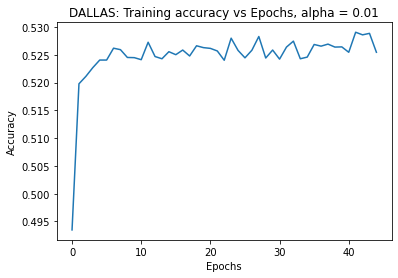

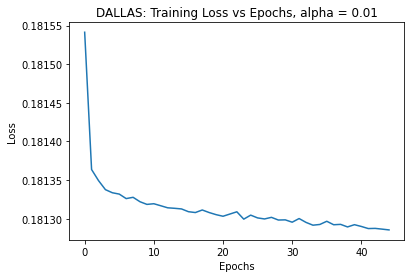

Training accuracy 25 epochs(lr 0.01): 52.54446268081665 
Training loss 25 epochs(lr 0.01): 0.18128545582294464 
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44]


In [ ]:
import matplotlib.pyplot as plt
#Plot testing accuracy vs Epochs - higher epochs, higher batch
plt.plot(history_da.history['acc']); plt.title('DALLAS: Training accuracy vs Epochs, alpha = 0.01'); plt.ylabel('Accuracy'); plt.xlabel('Epochs')
plt.show()

#Plot training loss vs Epochs
plt.plot(history_da.history['loss']); plt.title('DALLAS: Training Loss vs Epochs, alpha = 0.01'); plt.ylabel('Loss'); plt.xlabel('Epochs')
plt.show()

print(f"Training accuracy 25 epochs(lr 0.01): {history_da.history['acc'][-1] * 100} "); print(f"Training loss 25 epochs(lr 0.01): {history_da.history['loss'][-1]} ")

print(history_da.epoch)

**MODELING FOR HOUSTON CITY - HUMIDITY**

In [ ]:
# Modeling for Houston Humidity
training_data = humH.iloc[:30000]; testing_data = humH.iloc[30000:]

#Normalizing the data
scaler_ha = MinMaxScaler(feature_range=(0,1)); training_data_normalized = scaler_ha.fit_transform(training_data)

In [ ]:
# Split into input and outputs for Houston humidity
x_train_ha = []; y_train_ha = []
next = 4; past= 30

for i in range(0,len(training_data_normalized)-past-next+1):
    x_train_ha.append(training_data_normalized[i : i + past , 0])     
    y_train_ha.append(training_data_normalized[i + past : i + past + next , 0 ])

In [ ]:
x_train_ha , y_train_ha = np.array(x_train_ha), np.array(y_train_ha)

x_train_ha = np.reshape(x_train_ha, (x_train_ha.shape[0] , 1, x_train_ha.shape[1]))

In [ ]:
x_train_ha.shape

(29967, 1, 30)

In [ ]:
from keras.layers import LSTM,Dense,Dropout

# Training for 25 Epochs
model_haHum = Sequential()

model_haHum.add(LSTM(units=50, return_sequences=True, input_shape = (x_train_ha.shape[1],x_train_ha.shape[2])))
model_haHum.add(Dropout(0.2))
model_haHum.add(LSTM(32, return_sequences=True))
model_haHum.add(Dropout(0.2))
model_haHum.add(LSTM(32))
model_haHum.add(Dense(units = next,activation='softmax'))
model_haHum.compile(optimizer='adam', loss='mean_squared_error',metrics=['acc'])

history_ha = model_haHum.fit(x_train_ha, y_train_ha, epochs=25,batch_size=100 )

Epoch 1/25
300/300 [==============================] - 2s 6ms/step - loss: 0.2538 - acc: 0.5065
Epoch 2/25
300/300 [==============================] - 2s 6ms/step - loss: 0.2535 - acc: 0.5167
Epoch 3/25
300/300 [==============================] - 2s 6ms/step - loss: 0.2535 - acc: 0.5148
Epoch 4/25
300/300 [==============================] - 2s 6ms/step - loss: 0.2534 - acc: 0.5148
Epoch 5/25
300/300 [==============================] - 2s 6ms/step - loss: 0.2534 - acc: 0.5158
Epoch 6/25
300/300 [==============================] - 2s 6ms/step - loss: 0.2534 - acc: 0.5177
Epoch 7/25
300/300 [==============================] - 2s 6ms/step - loss: 0.2534 - acc: 0.5162
Epoch 8/25
300/300 [==============================] - 2s 6ms/step - loss: 0.2534 - acc: 0.5181
Epoch 9/25
300/300 [==============================] - 2s 6ms/step - loss: 0.2534 - acc: 0.5166
Epoch 10/25
300/300 [==============================] - 2s 6ms/step - loss: 0.2534 - acc: 0.5168
Epoch 11/25
300/300 [============================

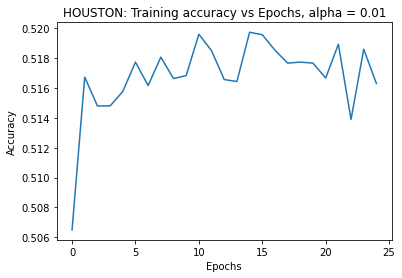

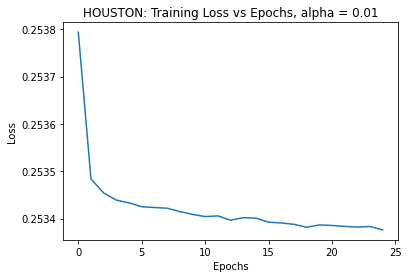

Training accuracy 25 epochs(lr 0.01): 51.63012742996216 
Training loss 25 epochs(lr 0.01): 0.25337618589401245 
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24]


In [ ]:
import matplotlib.pyplot as plt
#Plot testing accuracy vs Epochs
plt.plot(history_ha.history['acc']); plt.title('HOUSTON: Training accuracy vs Epochs, alpha = 0.01'); plt.ylabel('Accuracy'); plt.xlabel('Epochs')
plt.show()

#Plot training loss vs Epochs
plt.plot(history_ha.history['loss']); plt.title('HOUSTON: Training Loss vs Epochs, alpha = 0.01'); plt.ylabel('Loss'); plt.xlabel('Epochs')
plt.show()

print(f"Training accuracy 25 epochs(lr 0.01): {history_ha.history['acc'][-1] * 100} "); print(f"Training loss 25 epochs(lr 0.01): {history_ha.history['loss'][-1]} ")

print(history_ha.epoch)

In [ ]:
from keras.layers import LSTM,Dense,Dropout

# Training for 45 Epochs, batch size= 75
model_haHum = Sequential()

model_haHum.add(LSTM(units=50, return_sequences=True, input_shape = (x_train_ha.shape[1],x_train_ha.shape[2])))
model_haHum.add(Dropout(0.2))
model_haHum.add(LSTM(32, return_sequences=True))
model_haHum.add(Dropout(0.2))
model_haHum.add(LSTM(32))
model_haHum.add(Dense(units = next,activation='softmax'))
model_haHum.compile(optimizer='adam', loss='mean_squared_error',metrics=['acc'])

history_ha = model_haHum.fit(x_train_ha, y_train_ha, epochs=45, batch_size=75 )

Epoch 1/45
400/400 [==============================] - 2s 6ms/step - loss: 0.2537 - acc: 0.4937
Epoch 2/45
400/400 [==============================] - 2s 6ms/step - loss: 0.2535 - acc: 0.5146
Epoch 3/45
400/400 [==============================] - 2s 6ms/step - loss: 0.2535 - acc: 0.5147
Epoch 4/45
400/400 [==============================] - 2s 6ms/step - loss: 0.2534 - acc: 0.5154
Epoch 5/45
400/400 [==============================] - 2s 6ms/step - loss: 0.2534 - acc: 0.5166
Epoch 6/45
400/400 [==============================] - 2s 6ms/step - loss: 0.2534 - acc: 0.5165
Epoch 7/45
400/400 [==============================] - 2s 6ms/step - loss: 0.2534 - acc: 0.5173
Epoch 8/45
400/400 [==============================] - 2s 6ms/step - loss: 0.2534 - acc: 0.5156
Epoch 9/45
400/400 [==============================] - 2s 6ms/step - loss: 0.2534 - acc: 0.5178
Epoch 10/45
400/400 [==============================] - 2s 6ms/step - loss: 0.2534 - acc: 0.5164
Epoch 11/45
400/400 [============================

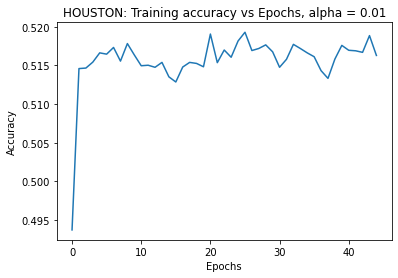

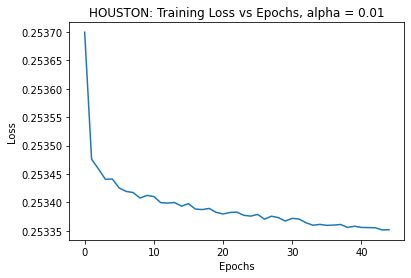

Training accuracy 25 epochs(lr 0.01): 51.63012742996216 
Training loss 25 epochs(lr 0.01): 0.253351628780365 
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44]


In [ ]:
import matplotlib.pyplot as plt
#Plot testing accuracy vs Epochs -  higher epochs, higher batch
plt.plot(history_ha.history['acc']); plt.title('HOUSTON: Training accuracy vs Epochs, alpha = 0.01'); plt.ylabel('Accuracy'); plt.xlabel('Epochs')
plt.show()

#Plot training loss vs Epochs
plt.plot(history_ha.history['loss']); plt.title('HOUSTON: Training Loss vs Epochs, alpha = 0.01'); plt.ylabel('Loss'); plt.xlabel('Epochs')
plt.show()

print(f"Training accuracy 25 epochs(lr 0.01): {history_ha.history['acc'][-1] * 100} "); print(f"Training loss 25 epochs(lr 0.01): {history_ha.history['loss'][-1]} ")

print(history_ha.epoch)